# Week 1 Curve Fitting
#### Student Number: 18044930

In this notebook we will explore how to create machine learning algorithms using only python and the help of the numpy library.

In [1]:
#appropriate imports
import numpy as np              
import matplotlib.pyplot as plt

To start with we will create a polynomial function adding some noise to each value trying to replicate what you might expect when carrying out an experiment. The parameters $\theta _i$ can define a polynomial such that $y(x) = \sum _i \theta _i x^i$, so if the had the parameters $[0,1]$ this would give $y(x) = 0 + x$ or simply $y(x) = x$.

In [2]:
def polyModelWithNoise(x,theta,sigma):
    """
    Inputs
    x:       numpy array of x values
    theta:   parameters of the polynomial
    sigma:   standard deviation of the noise distribution added to the polynomial function
    
    Returns: value of polynomial, with added noise, for the values of x 
    """
    for i in range(len(theta)):
        y = (x**i) * theta[i]                     #creates values of polynomial for values of x 
    for i in range(len(y)):
        y[i] = y[i] + np.random.normal(0,sigma)   #adds noise to polynomial
    return y

Using this function we can plot a sample of 100 linearly arranged between 0 and 1, where $\theta$ has the parameters of $[0,1]$ and the value for the standard deviation of the noise was 0.5.

In [3]:
#setting parameters for the polynomial function
x = np.linspace(0,1,100)
theta = np.array([0,1])

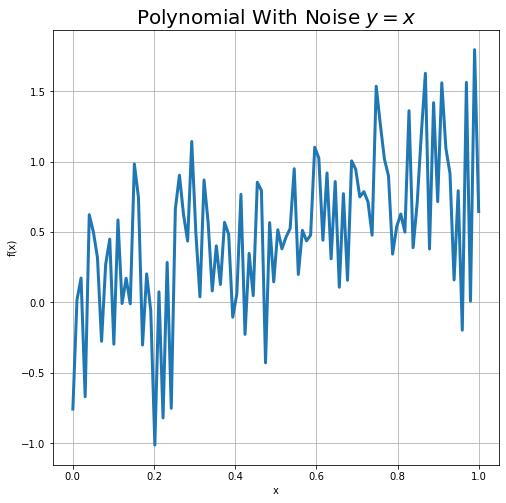

In [4]:
#plot of the polynomial with parameters [0,1]
plt.figure(figsize=(8,8))
plt.plot(x,polyModelWithNoise(x,theta,0.5),linewidth=3)
plt.title("Polynomial With Noise, $y=x$",fontsize=20)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True, axis = 'both')

The next step in the process of developing a machine learning algorithm will be defining another function which will return the gradient of a polynomial function with respect to the parameters $\theta _i$. So as we have seen the polynomial can be defined by $y(x) = \sum _i \theta _i x^i$ then the gradient with respect to $\theta _i$ is 
$\frac{\partial y(x)}{\partial \theta _i} = x^i$ as all the other terms in the polynomial go to zero.

In [5]:
def polyGradient(x,theta):
    """
    Inputs
    x:       numpy array of x values
    theta:   parameters of the polynomial
    
    Returns: gradient of the polynomial with respect to theta_i for the values of x 
    """
    grad = np.zeros((len(theta), len(x)))  #creates empty array for output
    for i in range(len(theta)):
        grad[i] = x**i                     #computes the gradients for the values of x
    return grad

def smp(nsmp):
    """
    Input
    nsmp:    length of sample required
    
    Returns: random sample of length nsmp in range [0,1] 
    """
    return np.random.random(nsmp)

The last step in this process is going to be defining a function that implements the stochastic gradient descent algorithm.

In [6]:
def stogrd(theta,theta_true,lr,it):
    """
    Inputs
    theta:      initial parameters for the stochastic gradient descent algorithm
    theta_true: the true parameters for the target polynomial 
    lr:         learning rate for algorithm 
    it:         number of iterations 
    
    Returns:    array of theta values for each iteration
    """
    #set up of output array
    thetaArray = np.zeros((it+1,len(theta)))
    thetaArray[0] = theta
    
    for i in range(it):
        X = smp(10)                                                               #gets sample values 
        dev = polyModelWithNoise(X,theta,0)-polyModelWithNoise(X,theta_true,0.5)  #computes deviation of true and predicted values
        theta -= lr*np.average(dev[None,:]*polyGradient(X,theta),axis=1)          #implementation of gradient descent
        thetaArray[i+1] = theta
    return thetaArray

Now we will implement a stochastic gradient descent algorithm. We will start the algorithm with $\theta = [-1,0.5]$ and a learning rate of $0.5$. We will then do $100$ iterations generating a random sample between $0$ and $1$ each time, at each point updating the value of $\theta _i$ using the gradient descent algorithm.  

In [7]:
#setting parameters for the polynomial function
theta  = np.array([-1,0.5])
theta_true = np.array([0,1])

#implementing a stochastic gradient descent algorithm
theta_array = stogrd(theta,theta_true,0.5,100)

Now we will try to fit a 1<sup>st</sup>, 3<sup>rd</sup> and 7<sup>th</sup> order polynomial using the same algorithm on a third order polynomial with the parameters $\theta = [0,1,2,2]$ between $0$ and $1$.

In [8]:
#creates initial random theta values for a 1st, 3rd and 7th order polynomial
theta1 = np.random.randn(2)
theta3 = np.random.randn(4)
theta7 = np.random.randn(8)

theta3_true = np.array([0,1,2,2]) #true value of target polynomial

#implements the algorithm for each different fit
theta_array1 = stogrd(theta1,theta3_true,0.5,100)
theta_array3 = stogrd(theta3,theta3_true,0.5,100)
theta_array7 = stogrd(theta7,theta3_true,0.5,100)

In [9]:
#printing the result of the algorithms 
print('Target Polynomial: {}x^3 + {}x^2 + {}x + {}'.format(theta3_true[3],theta3_true[2],theta3_true[1],
                                                           theta3_true[0]))

print('1st order Polynomial fit final result: {}x + {}'.format(round(theta_array1[-1][1],2),
                                                               round(theta_array1[-1][0],2)))

print('3rd order Polynomial fit final result: {}x^3 + {}x^2 + {}x + {}'.format(round(theta_array3[-1][3],2),
    round(theta_array3[-1][2],2),round(theta_array3[-1][1],2),round(theta_array3[-1][0],2)))

print('7th order Polynomial fit final result: {}x^7 + {}x^6 + {}x^5 + {}x^4 + {}x^3 + {}x^2 + {}x + {}'.format(
    round(theta_array7[-1][7],2),round(theta_array7[-1][6],2),round(theta_array7[-1][5],2),
    round(theta_array7[-1][4],2),round(theta_array7[-1][3],2),round(theta_array7[-1][2],2),
    round(theta_array7[-1][1],2),round(theta_array7[-1][0],2)))

Target Polynomial: 2x^3 + 2x^2 + 1x + 0
1st order Polynomial fit final result: 1.4x + -4.78
3rd order Polynomial fit final result: 2.12x^3 + 5.7x^2 + 3.14x + 6.42
7th order Polynomial fit final result: 2.42x^7 + 2.14x^6 + 2.88x^5 + 3.53x^4 + 3.82x^3 + 6.6x^2 + 7.73x + 11.35


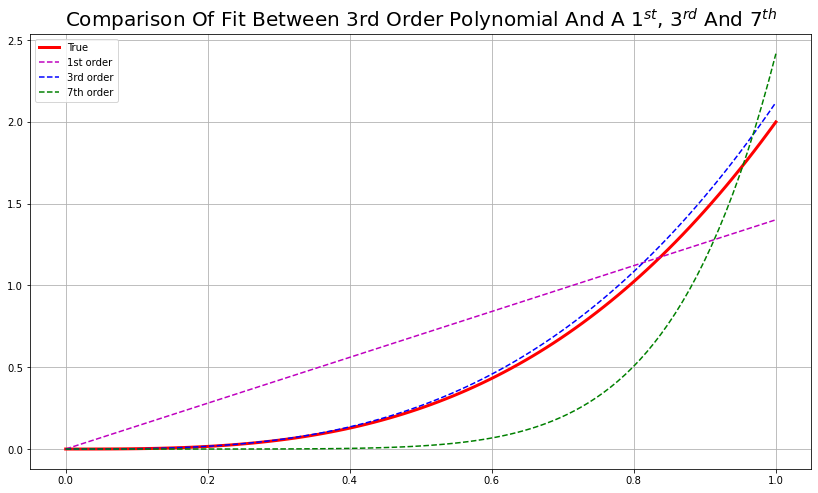

In [10]:
#plot of results of algorithms
plt.figure(figsize=(14,8))
plt.title('Comparison Of Fit Between 3rd Order Polynomial And A $1^{st}$, $3^{rd}$ And $7^{th}$',fontsize=20)
plt.plot(x,polyModelWithNoise(x,theta3_true,0),'r-',label = 'True',linewidth=3)
plt.plot(x,polyModelWithNoise(x,theta_array1[-1],0),'m--',label = '1st order')
plt.plot(x,polyModelWithNoise(x,theta_array3[-1],0),'b--',label = '3rd order')
plt.plot(x,polyModelWithNoise(x,theta_array7[-1],0),'g--',label = '7th order')
plt.legend()
plt.grid(True, axis ='both')

In the final step we will plot the three best fit models, which were trained over the range $x=[0,1]$,over an expanded $x$-range of $[-0.5,1.5]$.

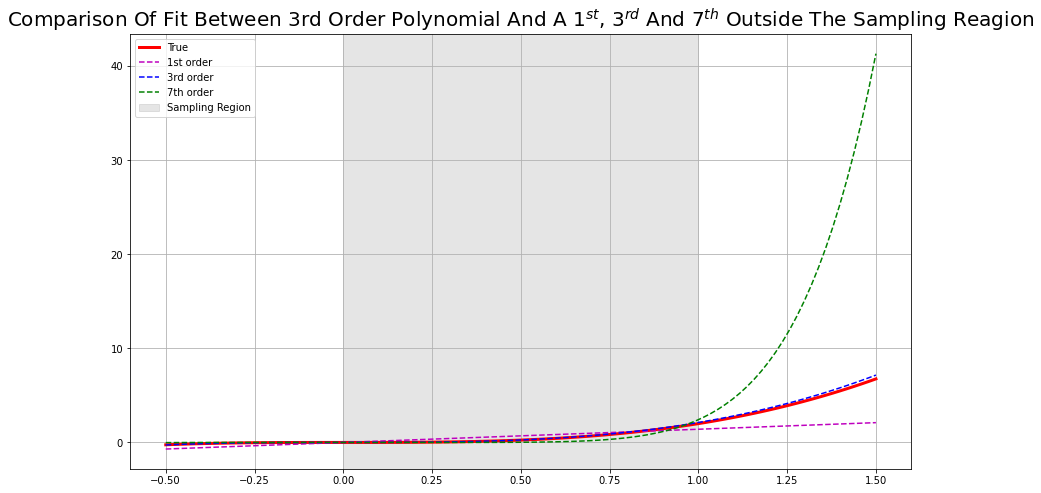

In [11]:
x2 = np.linspace(-0.5,1.5,100)
plt.figure(figsize=(14,8))
plt.title('Comparison Of Fit Between 3rd Order Polynomial And A $1^{st}$, $3^{rd}$ And $7^{th}$ Outside The Sampling Reagion',fontsize=20)
plt.plot(x2,polyModelWithNoise(x2,theta3_true,0),'r-',label = 'True',linewidth=3)
plt.plot(x2,polyModelWithNoise(x2,theta_array1[-1],0),'m--',label = '1st order')
plt.plot(x2,polyModelWithNoise(x2,theta_array3[-1],0),'b--',label = '3rd order')
plt.plot(x2,polyModelWithNoise(x2,theta_array7[-1],0),'g--',label = '7th order')
plt.axvspan(0, 1, color='grey', alpha=0.2, label= 'Sampling Region')
plt.legend()
plt.grid(True, axis = 'both')

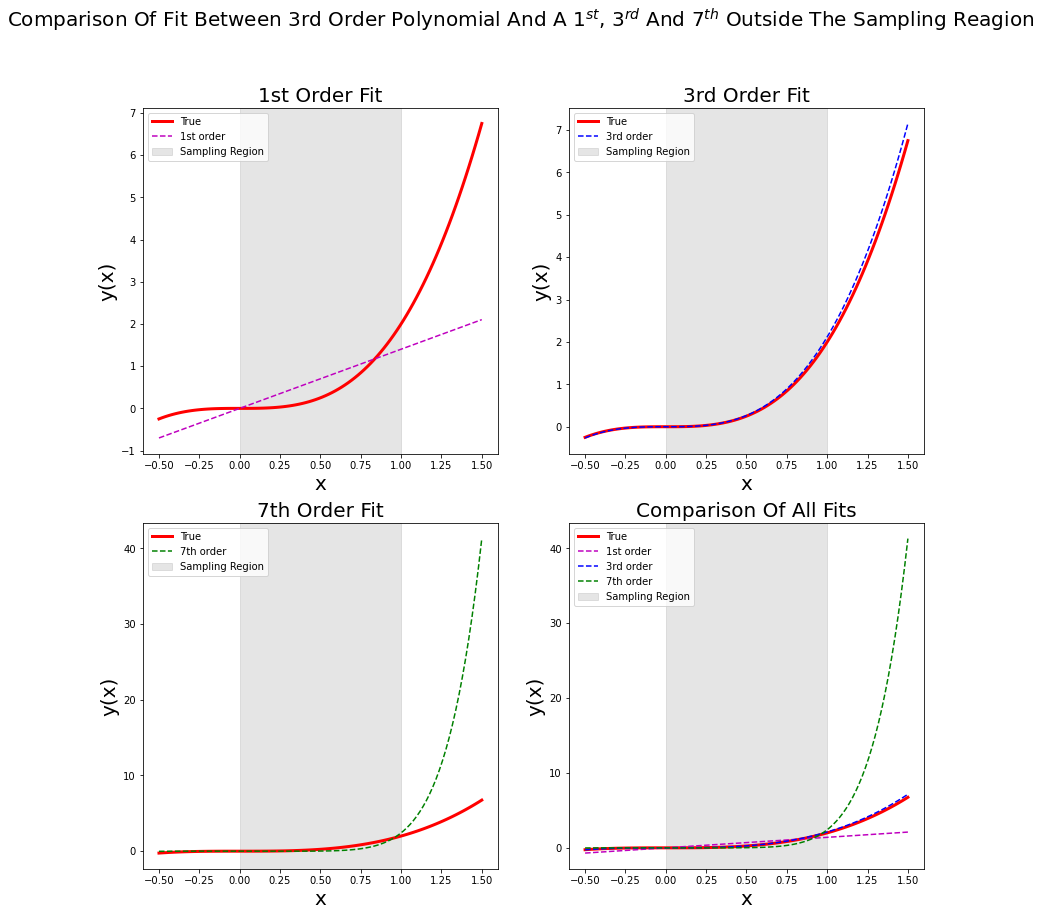

In [12]:
#creating subplots of the plot shown above to see more clearly the differences between various fits
fig1 = plt.figure(figsize=(14,14))
fig1.suptitle('Comparison Of Fit Between 3rd Order Polynomial And A $1^{st}$, $3^{rd}$ And $7^{th}$ Outside The Sampling Reagion',fontsize=20)

ax1 = fig1.add_subplot(221)
ax1.set_xlabel("x",fontsize=20)
ax1.set_ylabel("y(x)", fontsize=20)
ax1.set_title("1st Order Fit", fontsize=20)
ax1.plot(x2,polyModelWithNoise(x2,theta3_true,0),'r-',label = 'True',linewidth=3)
ax1.plot(x2,polyModelWithNoise(x2,theta_array1[-1],0),'m--',label = '1st order')
ax1.axvspan(0, 1, color='grey', alpha=0.2, label= 'Sampling Region')
ax1.legend()

ax2 = fig1.add_subplot(222)
ax2.set_xlabel("x",fontsize=20)
ax2.set_ylabel("y(x)", fontsize=20)
ax2.set_title("3rd Order Fit", fontsize=20)
ax2.plot(x2,polyModelWithNoise(x2,theta3_true,0),'r-',label = 'True',linewidth=3)
ax2.plot(x2,polyModelWithNoise(x2,theta_array3[-1],0),'b--',label = '3rd order')
ax2.axvspan(0, 1, color='grey', alpha=0.2, label= 'Sampling Region')
ax2.legend()

ax3 = fig1.add_subplot(223)
ax3.set_xlabel("x",fontsize=20)
ax3.set_ylabel("y(x)", fontsize=20)
ax3.set_title("7th Order Fit", fontsize=20)
ax3.plot(x2,polyModelWithNoise(x2,theta3_true,0),'r-',label = 'True',linewidth=3)
ax3.plot(x2,polyModelWithNoise(x2,theta_array7[-1],0),'g--',label = '7th order')
ax3.axvspan(0, 1, color='grey', alpha=0.2, label= 'Sampling Region')
ax3.legend()

ax4 = fig1.add_subplot(224)
ax4.set_xlabel("x",fontsize=20)
ax4.set_ylabel("y(x)", fontsize=20)
ax4.set_title("Comparison Of All Fits", fontsize=20)
ax4.plot(x2,polyModelWithNoise(x2,theta3_true,0),'r-',label = 'True',linewidth=3)
ax4.plot(x2,polyModelWithNoise(x2,theta_array1[-1],0),'m--',label = '1st order')
ax4.plot(x2,polyModelWithNoise(x2,theta_array3[-1],0),'b--',label = '3rd order')
ax4.plot(x2,polyModelWithNoise(x2,theta_array7[-1],0),'g--',label = '7th order')
ax4.axvspan(0, 1, color='grey', alpha=0.2, label= 'Sampling Region')
ax4.legend()








Looking at multiple different attempts at fitting the different polynomials to a third order polynomial, we can see that the first order attempt is not very accurate at any point really. The seventh order polynomial is sometimes quite close in the sampling region but outside this region diverges rapidly. The third order fit is the best both inside the sampling reggion and out, unsurprisingly.